In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import PIL
from tensorflow import keras

In [2]:
data_dir = './dataset/train'


In [3]:

from tensorflow.keras.utils import image_dataset_from_directory
#train_data=image_dataset_from_directory(data_dir)
image_height = 256
batch_size=32
train_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=3,
  image_size=(image_height, image_height),
  batch_size=batch_size)

Found 5070 files belonging to 13 classes.
Using 4056 files for training.


In [4]:
class_names = train_ds.class_names
print(class_names)
len(class_names)

['Acral_Lentiginous_Melanoma', 'Onychogryphosis', 'beau_s lines', 'blue_finger', 'clubbing', 'healthy', 'koilonychia', 'onychomycosis', 'pitting', 'psoriasis', 'terry_s nail', 'white nail', 'yellow nails']


13

In [5]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [6]:
val_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=3,
  image_size=(image_height, image_height),
  batch_size=batch_size)

Found 5070 files belonging to 13 classes.
Using 1014 files for validation.


In [7]:
from keras.applications import ResNet50
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation, Flatten, Dense

resnet_model = Sequential()

pretrained_model= ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',
                   classes=13,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(15, activation='softmax'))

In [8]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [9]:
resnet_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 24,644,495
Trainable params: 1,056,783
Non-trainable params: 23,587,712
_________________________________________________________________


In [10]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data = val_ds,  
  epochs=epochs
)

Epoch 1/10
127/127 [==============================] - 456s 4s/step - loss: 0.9149 - accuracy: 0.6886 - val_loss: 0.6055 - val_accuracy: 0.7722
Epoch 2/10
127/127 [==============================] - 502s 4s/step - loss: 0.4465 - accuracy: 0.8319 - val_loss: 0.5107 - val_accuracy: 0.8156
Epoch 3/10
127/127 [==============================] - 518s 4s/step - loss: 0.3006 - accuracy: 0.8952 - val_loss: 0.6721 - val_accuracy: 0.7751
Epoch 4/10
127/127 [==============================] - 518s 4s/step - loss: 0.2202 - accuracy: 0.9233 - val_loss: 0.4471 - val_accuracy: 0.8353
Epoch 5/10
127/127 [==============================] - 546s 4s/step - loss: 0.1647 - accuracy: 0.9450 - val_loss: 0.4468 - val_accuracy: 0.8501
Epoch 6/10
127/127 [==============================] - 520s 4s/step - loss: 0.1025 - accuracy: 0.9716 - val_loss: 0.4029 - val_accuracy: 0.8481
Epoch 7/10
127/127 [==============================] - 496s 4s/step - loss: 0.0967 - accuracy: 0.9707 - val_loss: 0.5185 - val_accuracy: 0.8254

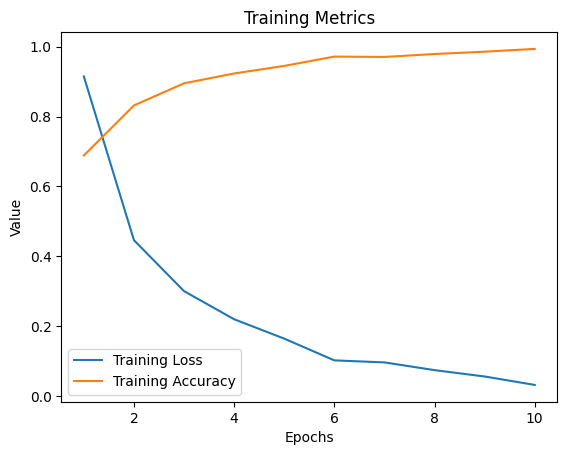

In [11]:
resnet_model.save('naildisease.h5')
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

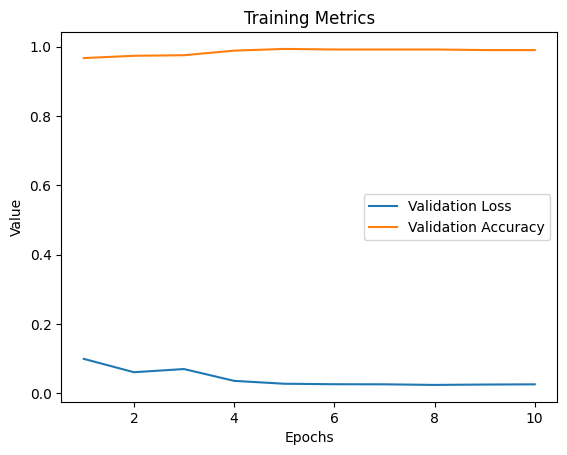

In [16]:
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()


In [3]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model
model = tf.keras.models.load_model('naildisease.h5')

# Load the test dataset (assuming dataset is in TensorFlow format)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/test',
    image_size=(256, 256),  # Change to match your model input size
    batch_size=32
)

# Get class names
class_names = test_data.class_names

# Prepare test data
test_images = []
test_labels = []

for images, labels in test_data:
    test_images.append(images)
    test_labels.append(labels)

test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)

# Get predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Generate classification report
report = classification_report(test_labels, predicted_labels, target_names=class_names)
print("Classification Report:\n", report)



Found 429 files belonging to 13 classes.
14/14 [==============================] - 40s 3s/step
Classification Report:
                             precision    recall  f1-score   support

Acral_Lentiginous_Melanoma       0.90      1.00      0.95        18
           Onychogryphosis       0.79      0.92      0.85        12
              beau_s lines       0.78      0.88      0.82         8
               blue_finger       0.73      0.89      0.80         9
                  clubbing       1.00      0.81      0.90        16
                   healthy       0.97      0.94      0.96        82
               koilonychia       1.00      1.00      1.00         8
             onychomycosis       0.90      0.97      0.93       146
                   pitting       0.93      0.88      0.90        16
                 psoriasis       0.93      0.81      0.87        91
              terry_s nail       1.00      0.67      0.80         9
                white nail       1.00      1.00      1.00        

In [12]:
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
class_names = ['Acral_Lentiginous_Melanoma', 'Onychogryphosis', 'beau_s lines', 'blue_finger', 'clubbing', 'healthy', 'koilonychia', 'onychomycosis', 'pitting', 'psoriasis', 'terry_s nail', 'white nail', 'yellow nails']
# Load the saved model
model = load_model('naildisease.h5')


def predict_img(fpath):
    
    image=cv2.imread(fpath)
    example = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(example)
    image_resized= cv2.resize(image, (256,256))
    image=np.expand_dims(image_resized,axis=0)
    pred=model.predict(image)
    confidence = np.max(pred) * 100
    print(confidence)
    output=class_names[np.argmax(pred)]
    print(output)

1/1 [==============================] - 1s 980ms/step
98.73930811882019
blue_finger


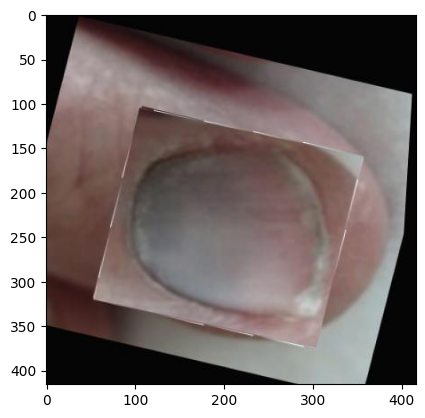

In [13]:
predict_img('test.jpg')